In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from tqdm import tqdm
import imtools as imt
#import show_profiles as sh
from glob import glob
# import dkist
import atlas as S
import mfits
from scipy.ndimage import shift
import pandas as pd
from sklearn import linear_model
import congrid2

In [34]:

ff = glob('/Volumes/HD5TB/dkistdata/pid_2_114/ViSP*crop_L1*fits')
print(ff)

['/Volumes/HD5TB/dkistdata/pid_2_114/ViSP_Ca_crop_L1.fits', '/Volumes/HD5TB/dkistdata/pid_2_114/ViSP_Fe_crop_L1.fits', '/Volumes/HD5TB/dkistdata/pid_2_114/ViSP_Na_crop_L1.fits']


In [35]:
cao = fits.open(ff[0])[0].data
feo = fits.open(ff[1])[0].data
nao = fits.open(ff[2])[0].data

In [36]:
cao.shape, feo.shape, nao.shape

((4, 425, 936, 2301), (4, 425, 980, 1504), (4, 425, 995, 1875))

<class 'numpy.ndarray'> (array([], dtype=int64),)
(array([], dtype=int64),) (array([], dtype=int64),) (array([1491, 1492]),)


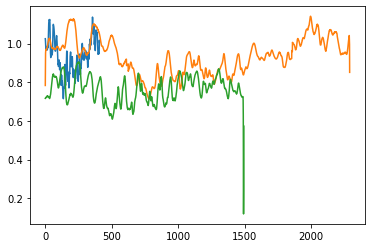

In [37]:
plt.plot(fe[0,100,0,:])
zf = np.where(fe[0,100,0,:] < 0.3)


plt.plot(ca[0,100,0,:])
zc = np.where(ca[0,100,0,:] < 0.3)
print(type(zf[0]),zc)

plt.plot(na[0,100,0,:])
zn = np.where(na[0,100,0,:] < 0.3)

# f0, f1 = zf[0][0], zf[0][-1]
# c0, c1 = zc[0][0], zc[0][-1]

print(zf, zc, zn)

In [38]:
# read header
fn = glob('/Volumes/HD5TB/dkistdata/pid_2_114/AVZLY/*fits')
hdr = fits.open(fn[0])[1].header
xscln = hdr['cdelt1'] # pixels along slit
wscln = hdr['cdelt2'] # pixels to nm
yscln = hdr['cdelt3'] # slit width 

print(xscln, wscln, yscln)

ff = glob('/Volumes/HD5TB/dkistdata/pid_2_114/AWVMV/*fits')
hdr = fits.open(ff[0])[1].header
xsclf = hdr['cdelt1'] # pixels along slit
wsclf = hdr['cdelt2'] # pixels to nm
ysclf = hdr['cdelt3'] # slit width 
print(xsclf, wsclf, ysclf)



fc = glob('/Volumes/HD5TB/dkistdata/pid_2_114/AXYNP/*fits')
hdr = fits.open(fc[0])[1].header
xsclc = hdr['cdelt1'] # pixels along slit
wsclc = hdr['cdelt2'] # pixels to nm
ysclc = hdr['cdelt3'] # slit width 
print(xsclc, wsclc, ysclc)


0.02385787624354498 0.001052397146603632 0.10663665332054767
0.029588155836019415 0.00162513455387821 0.10693213039261118
0.019272966307685855 0.000999852488051306 0.10716877450928362


In [40]:
fe = feo[:,:,:,5:1500]
na = nao[:,:,:,10:1869]
ca= cao[:,:,:,6:2296]
ca.shape, fe.shape, na.shape

((4, 425, 936, 2290), (4, 425, 980, 1495), (4, 425, 995, 1859))

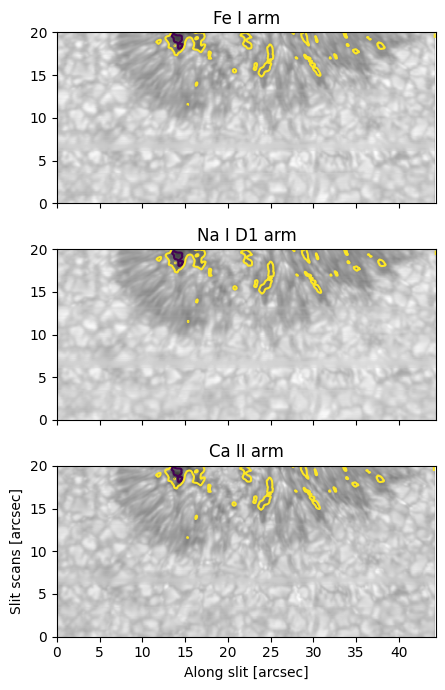

In [50]:
fig, ax = plt.subplots(figsize=(5,7),ncols=1, nrows=3, sharex=True,dpi=100,sharey=True)
ax = ax.flatten()
lbls = ['Stokes I/I$_c$', 'Stokes Q/I$_c$', 'Stokes U/I$_c$','Stokes V/I$_c$' ]

nS, nX, nW, nY = fe.shape
ax[0].imshow(fe[0,:,50,:], cmap='gray',origin='lower', extent=[0,nY*xsclf, 0, nX*ysclf])#, vmin=0.0, vmax=1.05)
ax[0].contour(fe[0,:,50,:], levels=[0.53,.7],origin='lower', extent=[0,nY*xsclf, 0, nX*ysclf])

nS, nX, nW, nY = na.shape
ax[1].imshow(na[0,:,160,:], cmap='gray', origin='lower', extent=[0,nY*xscln, 0, nX*yscln])#, vmin=0.0, vmax=1.05)
ax[1].contour(fe[0,:,50,:], levels=[0.53,0.7],origin='lower', extent=[0,nY*xscln, 0, nX*yscln])

nS, nX, nW, nY = ca.shape
ax[2].imshow(ca[0,:,60,:], cmap='gray',origin='lower', extent=[0,nY*xsclc, 0, nX*ysclc])#, vmin=0.0, vmax=1.05)
ax[2].contour(fe[0,:,50,:], levels=[0.53,0.7],origin='lower', extent=[0,nY*xsclc, 0, nX*ysclc])

# for i in range(3):

#     ax[i].imshow(ca[i,:,600,:], cmap='gray', extent=[0,nSlitp*xscl, 0, nScans*yscl])#, vmin=0.0, vmax=1.05)
#     ax[i].set_title(lbls[i])

ax[-1].set_xlabel('Along slit [arcsec]')
ax[-1].set_ylabel('Slit scans [arcsec]')

ax[0].set_title('Fe I arm')
ax[1].set_title('Na I D1 arm')
ax[2].set_title('Ca II arm')

plt.ylim(0,20)
plt.tight_layout()

In [ ]:
# binned along slit to make a pixel size of 0.107x0.107
# and save coaligned arms
nS, nX, nW, nY = fe.shape
fes = resize(fe, [nS, nX,nW, 414], order=1, anti_aliasing=True)
nas = resize(na, [nS, nX,nW, 414], order=1, anti_aliasing=True)
cas = resize(cas, [nS, nX,nW, 414], order=1, anti_aliasing=True)


mfits.writefits('/Volumes/HD5TB/dkistdata/pid_2_114/ViSP_fe_crop_samesize_L1.fits',fes)
mfits.writefits('/Volumes/HD5TB/dkistdata/pid_2_114/ViSP_fe_crop_samesize_L1.fits',nas)
mfits.writefits('/Volumes/HD5TB/dkistdata/pid_2_114/ViSP_fe_crop_samesize_L1.fits',cas)

In [51]:
# Now read and check saved files 
ff = glob('/Volumes/HD5TB/dkistdata/pid_2_114/ViSP*crop_samesize*fits')
print(ff)

['/Volumes/HD5TB/dkistdata/pid_2_114/ViSP_ca_crop_samesize_L1.fits', '/Volumes/HD5TB/dkistdata/pid_2_114/ViSP_fe_crop_samesize_L1.fits', '/Volumes/HD5TB/dkistdata/pid_2_114/ViSP_na_crop_samesize_L1.fits']


In [52]:
ca = fits.open(ff[0])[0].data
fe = fits.open(ff[1])[0].data
na = fits.open(ff[2])[0].data

In [53]:
ca.shape, fe.shape, na.shape

((4, 425, 936, 414), (4, 425, 980, 414), (4, 425, 995, 414))

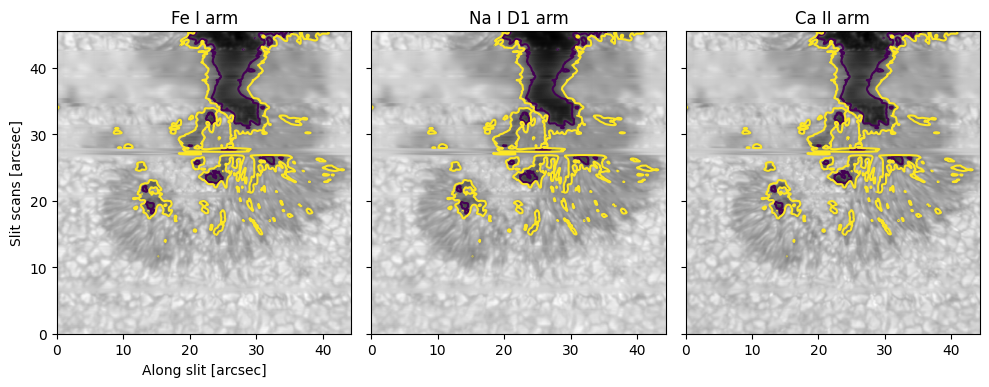

In [60]:
xscl, yscl = 0.107, 0.107

fig, ax = plt.subplots(figsize=(10,7),ncols=3, nrows=1, sharex=True,dpi=100,sharey=True)
ax = ax.flatten()
lbls = ['Stokes I/I$_c$', 'Stokes Q/I$_c$', 'Stokes U/I$_c$','Stokes V/I$_c$' ]

nS, nX, nW, nY = fe.shape
ax[0].imshow(fe[0,:,50,:], cmap='gray',origin='lower', extent=[0,nY*xscl, 0, nX*yscl])#, vmin=0.0, vmax=1.05)
ax[0].contour(fe[0,:,50,:], levels=[0.53,.7],origin='lower', extent=[0,nY*xscl, 0, nX*yscl])

nS, nX, nW, nY = na.shape
ax[1].imshow(na[0,:,160,:], cmap='gray', origin='lower', extent=[0,nY*xscl, 0, nX*yscl])#, vmin=0.0, vmax=1.05)
ax[1].contour(fe[0,:,50,:], levels=[0.53,0.7],origin='lower', extent=[0,nY*xscl, 0, nX*yscl])

nS, nX, nW, nY = ca.shape
ax[2].imshow(ca[0,:,10,:], cmap='gray',origin='lower', extent=[0,nY*xscl, 0, nX*yscl])#, vmin=0.0, vmax=1.05)
ax[2].contour(fe[0,:,50,:], levels=[0.53,0.7],origin='lower', extent=[0,nY*xscl, 0, nX*yscl])

# for i in range(3):

#     ax[i].imshow(ca[i,:,600,:], cmap='gray', extent=[0,nSlitp*xscl, 0, nScans*yscl])#, vmin=0.0, vmax=1.05)
#     ax[i].set_title(lbls[i])

ax[0].set_xlabel('Along slit [arcsec]')
ax[0].set_ylabel('Slit scans [arcsec]')

ax[0].set_title('Fe I arm')
ax[1].set_title('Na I D1 arm')
ax[2].set_title('Ca II arm')

plt.ylim(0,None)
plt.tight_layout()